![example 8.2](assets/8.2_figure_8.2.png)

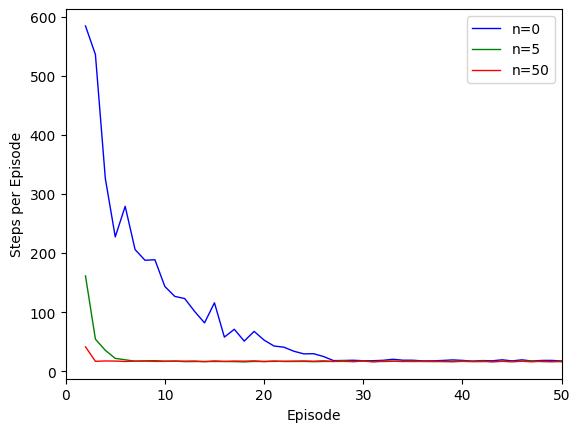

In [ ]:
import random
import copy
import matplotlib.pyplot as plt
import numpy as np

maze = [
    ['0', '0', '0', '0', '0', '0', '0', '1', 'g'],
    ['0', '0', '1', '0', '0', '0', '0', '1', '0'],
    ['s', '0', '1', '0', '0', '0', '0', '1', '0'],
    ['0', '0', '1', '0', '0', '0', '0', '0', '0'],
    ['0', '0', '0', '0', '0', '1', '0', '0', '0'],
    ['0', '0', '0', '0', '0', '0', '0', '0', '0']
]

GAMMA = .95
ALPHA = .1
EPSILON = .1
SEED = 41
random.seed(SEED)

INITIAL_ACTION_VALUES = {
    (i, j): {
        'up': 0,
        'down': 0,
        'left': 0,
        'right': 0
    } for i in range(6) for j in range(9)
}

def next_state_and_reward(state, action):
    proposed_state = state
    if action == 'up':
        proposed_state = (state[0] - 1, state[1])
    elif action == 'down':
        proposed_state = (state[0] + 1, state[1])
    elif action == 'left':
        proposed_state = (state[0], state[1] - 1)
    elif action == 'right':
        proposed_state = (state[0], state[1] + 1)

    if proposed_state[0] < 0 or proposed_state[0] > 5 or proposed_state[1] < 0 or proposed_state[1] > 8:
        proposed_state = state

    if maze[proposed_state[0]][proposed_state[1]] == '1':
        proposed_state = state
   
    reward = 1 if maze[proposed_state[0]][proposed_state[1]] == 'g' else 0

    return proposed_state, reward

def get_action(state, q):
    if random.random() < EPSILON:
        return random.choice(['up', 'down', 'left', 'right'])
    else:
        max_q = max(q[state].values())
        actions = [action for action, value in q[state].items() if value == max_q]
        return random.choice(actions)

def get_greedy_action(state, q):
    max_q = max(q[state].values())
    actions = [action for action, value in q[state].items() if value == max_q]
    return random.choice(actions)

def generate_episode(q):
    s = (2, 0)
    episode = [s]
    reward = 0
    while maze[s[0]][s[1]] != 'g':
        a = get_greedy_action(s, q)
        s_prime, reward = next_state_and_reward(s, a)
        episode.append(s_prime)
        s = s_prime
    return episode

def update_model(model, s, a, s_prime, reward):
    if s not in model:
        model[s] = {}
    model[s][a] = (s_prime, reward)

def dyna_train(num_episodes, n, q):
    model = {}
    episode_steps = []
    completed_episodes = 0
    step = 1
    s = (2, 0)
    while completed_episodes < num_episodes:
        a = get_action(s, q)
        s_prime, reward = next_state_and_reward(s, a)
        q[s][a] += ALPHA * (reward + GAMMA * max(q[s_prime].values()) - q[s][a])
        update_model(model, s, a, s_prime, reward)

        for _ in range(n):
            dyna_s = random.choice(list(model.keys()))
            dyna_a = random.choice(list(model[dyna_s].keys()))
            dyna_s_prime, dyna_reward = model[dyna_s][dyna_a]
            q[dyna_s][dyna_a] += ALPHA * (dyna_reward + GAMMA * max(q[dyna_s_prime].values()) - q[dyna_s][dyna_a])

        s = s_prime
        if maze[s[0]][s[1]] == 'g':
            completed_episodes += 1
            episode_steps.append(step)
            step = 1
            s = (2, 0)
        else:
            step += 1

    return q, episode_steps

def get_avg_30_runs(num_episodes, n):
    planning_runs = []
    for _ in range(30):
        _, episode_steps = dyna_train(num_episodes, n, q=copy.deepcopy(INITIAL_ACTION_VALUES))
        planning_runs.append(episode_steps)

    return np.mean(planning_runs, axis=0).tolist()

In [ ]:
avg_planning_0 = get_avg_30_runs(50, 0)
avg_planning_5 = get_avg_30_runs(50, 5)
avg_planning_50 = get_avg_30_runs(50, 50)

x = list(range(1, 51))
plt.plot(x[1:], avg_planning_0[1:], color='blue', label='n=0', linewidth=1)
plt.plot(x[1:], avg_planning_5[1:], color='green', label='n=5', linewidth=1)
plt.plot(x[1:], avg_planning_50[1:], color='red', label='n=50', linewidth=1)

plt.xlim(0, 50)
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.legend()
plt.show()

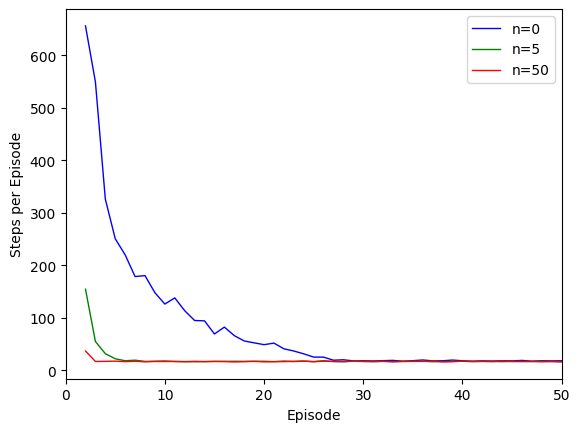

In [192]:
avg_planning_0 = get_avg_30_runs(50, 0)
avg_planning_5 = get_avg_30_runs(50, 5)
avg_planning_50 = get_avg_30_runs(50, 50)

x = list(range(1, 51))
plt.plot(x[1:], avg_planning_0[1:], color='blue', label='n=0', linewidth=1)
plt.plot(x[1:], avg_planning_5[1:], color='green', label='n=5', linewidth=1)
plt.plot(x[1:], avg_planning_50[1:], color='red', label='n=50', linewidth=1)

plt.xlim(0, 50)
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.legend()
plt.show()